<a href="https://colab.research.google.com/github/choki0715/UnLiteFlowNet-PIV/blob/master/NIA95_AIDEN_sfw_%EC%9B%90%EC%B2%9C%EB%8D%B0%EC%9D%B4%ED%84%B0__auto_20221231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
#import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm # 그래프 한글 font 로딩.

import numpy as np
import pandas as pd
import glob
#from sklearn.model_selection import train_test_split  # <- split 사용 확인 필요.
import time
from datetime import datetime
import unicodedata  #<---------- 유니코드 문자열 정의 모듈. : 필요한지 확인 필요.
#import re           #<---------- 정규식처리를 위한 모듈 : 필요한지 확인 필요. 
import os 
import io
import seaborn as sns
import IPython
import IPython.display
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['axes.grid'] = False

# -*- coding: utf-8 -*-

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_wl = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수위_241.csv', encoding='cp949')
# df_wq = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수질_241.csv', encoding='cp949')

# df_wq_10p = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/1cycle_수집_(10%)/국가_수질_데이터셋.zip (Unzipped Files)/국가_수질_가평가평_2224.csv', encoding='cp949')

# df_sfw_namkang = pd.read_csv('/content/drive/MyDrive/NIA_AIDEN_01_(상-취수원)/비전21테크_10%데이터 남강,영천(20220914)/³²°­´ï_2020_110_3689280.csv', header = 1) #, encoding='cp949')
#in_path = '/content/drive/MyDrive/NIA_AIDEN_02_(상-취수원)/month_11_new_meta/Type-1 (2022-11-10)/121_h/csv/done/'
in_path = '/content/drive/MyDrive/NIA_AIDEN_02_(상-취수원)/month_11_new_meta/Type-1 (2022-11-10)/121_m/csv/'

file_list = os.listdir(in_path)

print(file_list[0])
print(len(file_list))
df = pd.read_csv(in_path + '/' + file_list[0])
print(len(df))
df.head()

AI-095-1_121_C030_m.csv
31
1218875


,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn,temp,precipitation,wind_velocity
0,C030,2020-01-01 0:00,1.903100,48.7500,6.621600,0,0,0,0,0,...,0,0,0,0,0,0,0,-2.9,0.0,1.0
1,C030,2020-01-01 0:01,1.900264,48.7358,6.622791,0,0,0,0,0,...,0,0,0,0,0,0,0,-2.9,0.0,1.0
2,C030,2020-01-01 0:02,1.897427,48.7216,6.623982,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.1,0.0,1.3
3,C030,2020-01-01 0:03,1.894591,48.7074,6.625173,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.3,0.0,1.9
4,C030,2020-01-01 0:04,1.891755,48.6932,6.626364,0,0,0,0,0,...,0,0,0,0,0,0,0,-3.5,0.0,1.7


my_data
FILE: AI-095-1_121_C002_m.csv
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_08
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_13
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_15
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_14
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_05
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_11
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_17
new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_01/11월/11_10


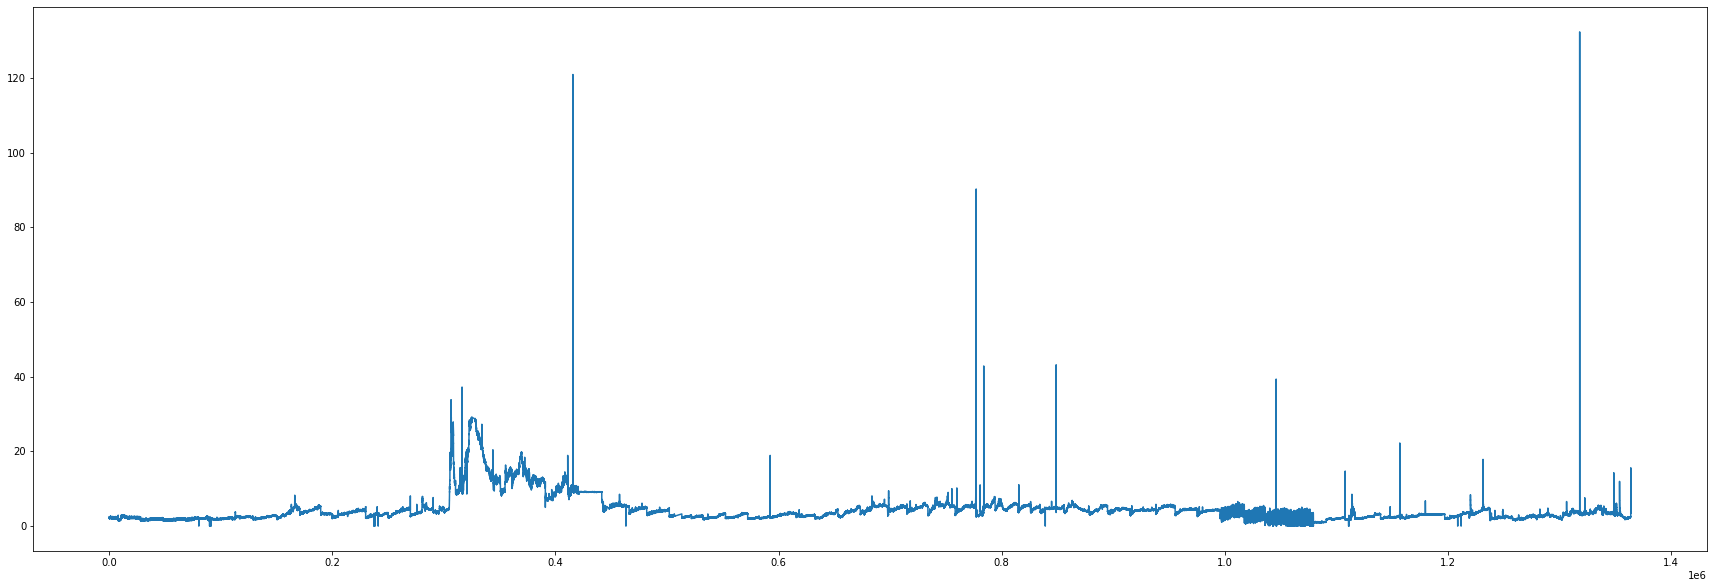

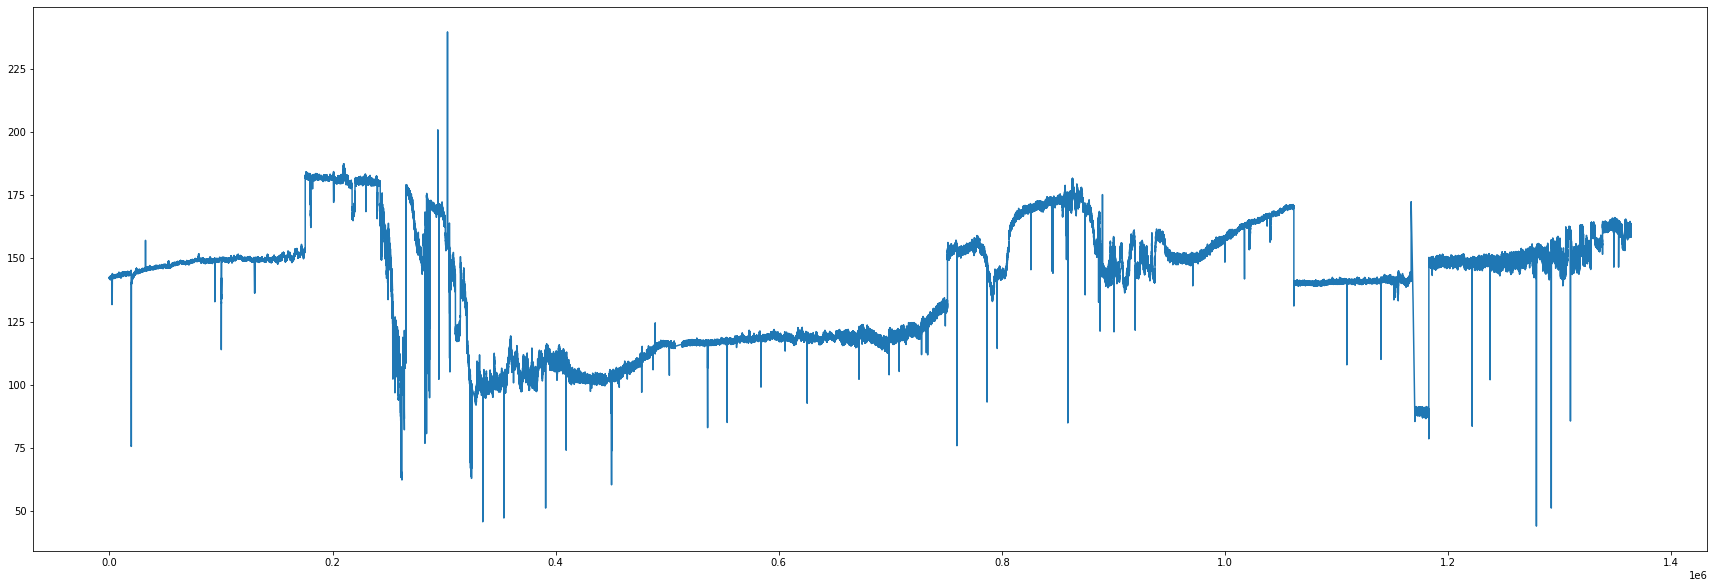

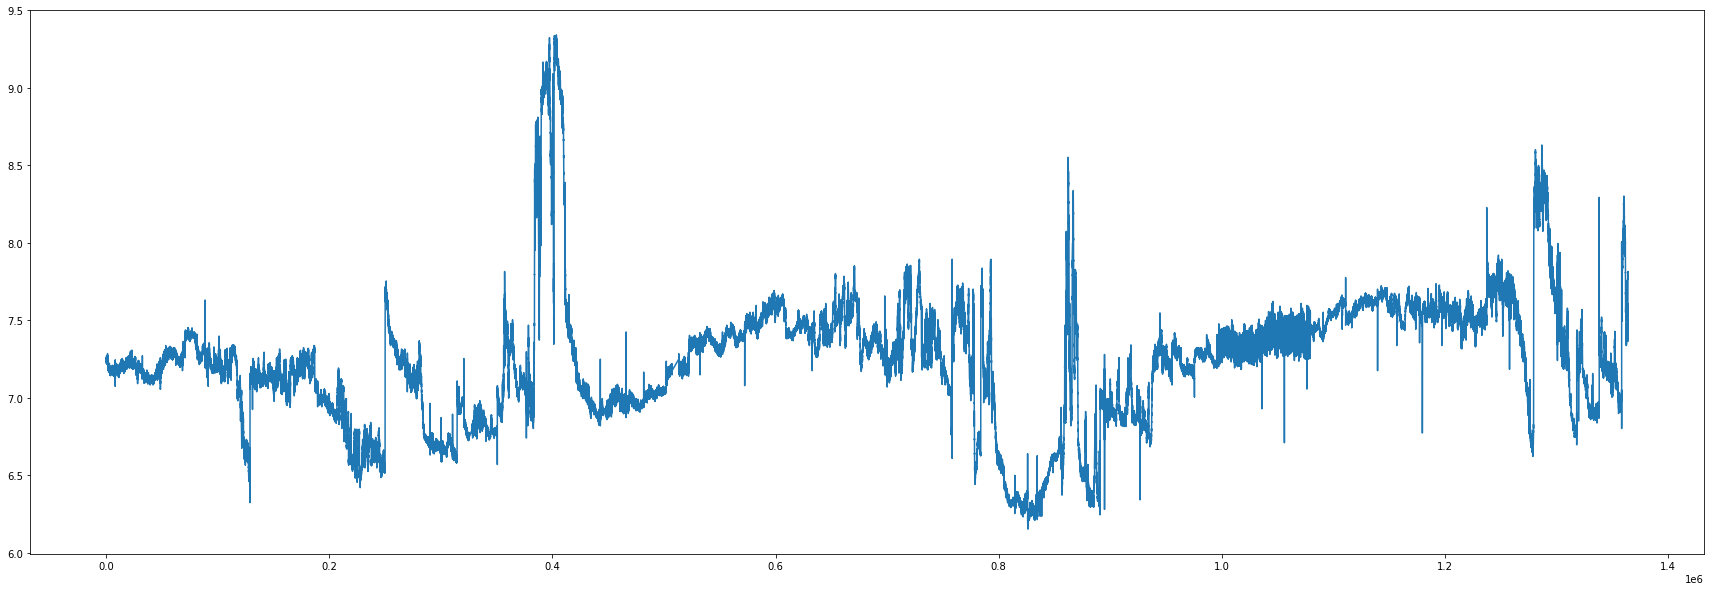

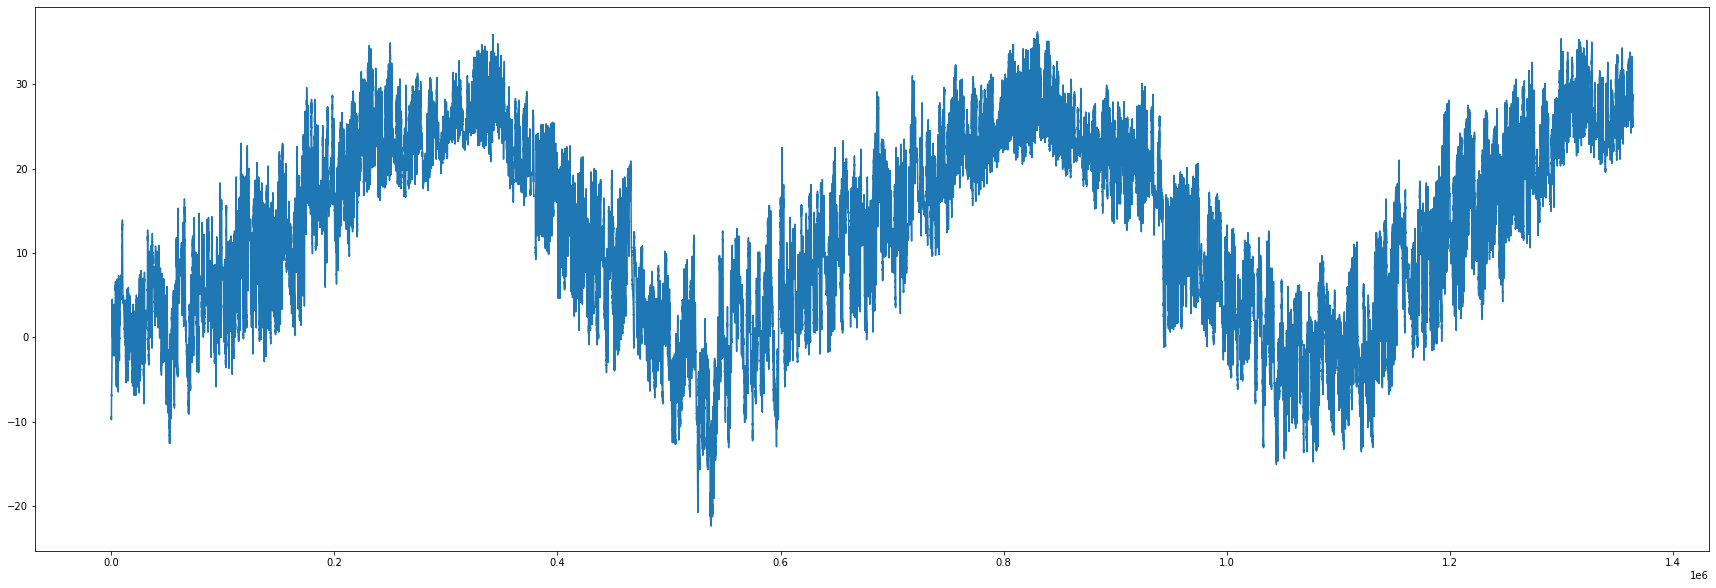

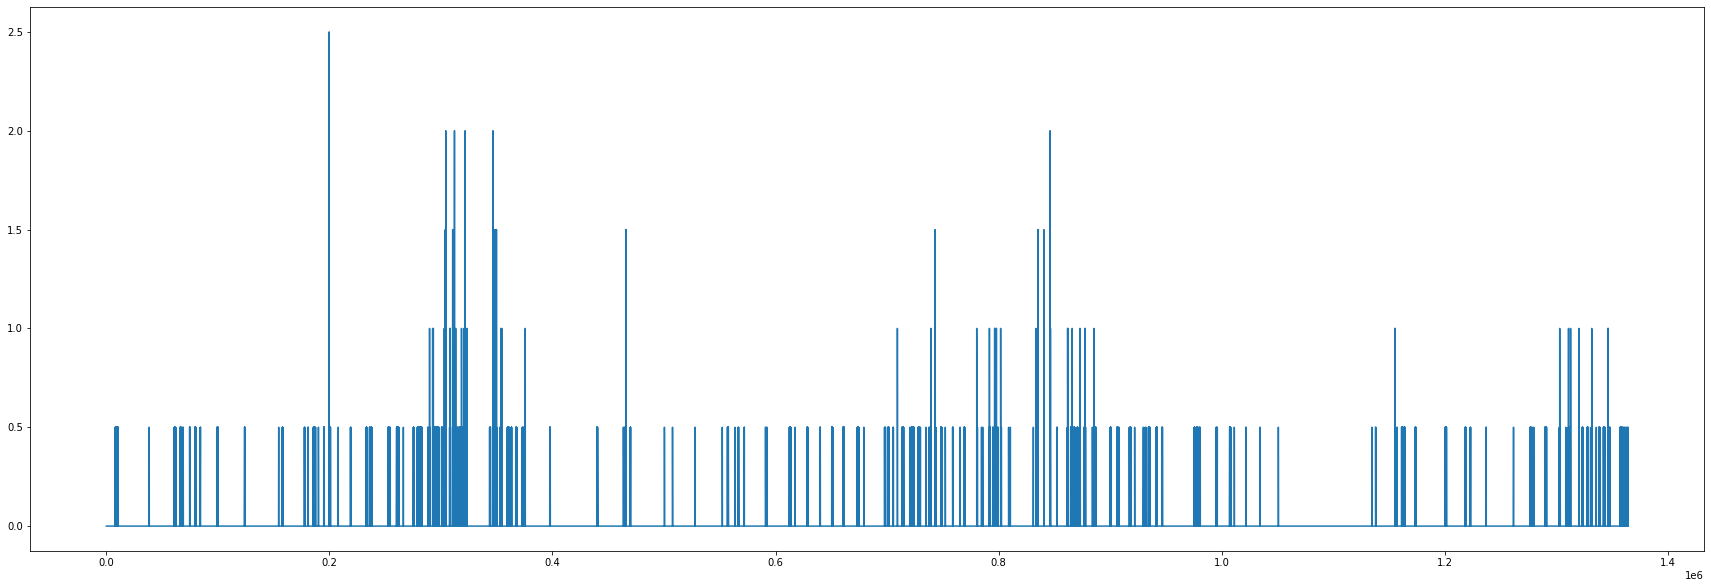

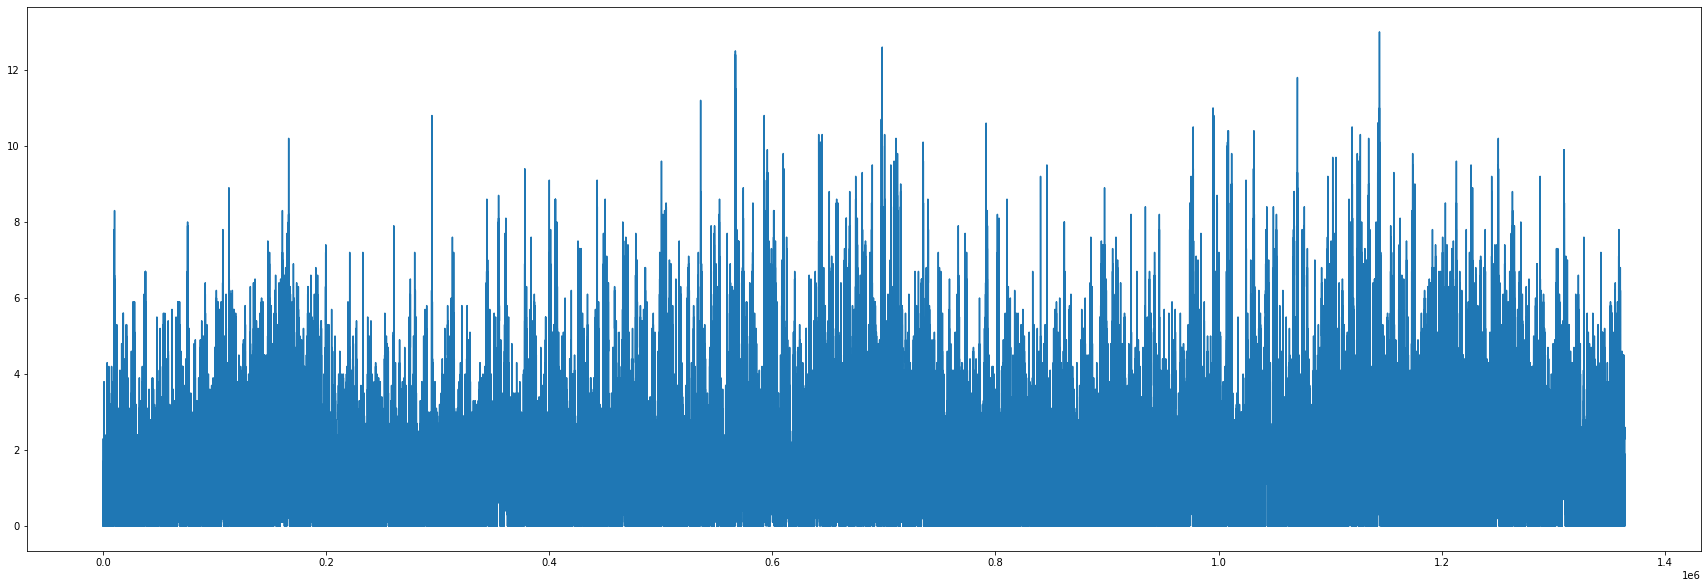

total amount of task:  602
current file index:  3


In [ ]:

features = ['turbidity', 'EC','pH','temp', 'precipitation', 'wind_velocity']

#work_count = [121, 118, 103, 170, 148, 111, 129, 107, 134, 122]
work_count = [82, 78, 86, 91, 83, 89, 93, 85, 81, 87]

#work_date = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', 
#             '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']

work_date = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16','17']
#work_date = ['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
#work_date = ['20', '31', '30']
#work_date = ['02', '02', '02', '06', '15', '15', '12', '15']

num_date = len(work_date)

### Here saving directory !!!
imonth_for_file = '11_'
imonth_for_dir = '11_'

creation_mon = '_2022' + imonth_for_file
file_loc = '/content/drive/MyDrive/NIA_AIDEN_01/11월/' 



### start task 2000 summary
#amount_task = 1050 #8
#amount_task = 1680 # 9
#amount_task = 1310 # 10  
amount_task = 450  #11

try_count = 0
ichange = 0
cnt = 0
total_count = 0
init_idx = 3

for file_iter in range(init_idx, len(file_list)):

  input_file = file_list[file_iter]
  data = pd.read_csv(in_path + input_file)
  my_data = data[features]

  print('my_data') 
  print('FILE:', input_file)

  for i in range(len(my_data)//2000):

    start_int = i*2000
    end_int = (i+1)*2000
    start_str = f'{start_int}'
    end_str = f'{end_int}'
    surfix = start_str + '_' + end_str + '.xlsx'

    # create a new directory for print out result
    #----------------------------------------------------------
    if cnt == 0:
      work_point = work_date[np.random.randint(0,num_date)]
      file_loc_date = file_loc + imonth_for_dir + work_point 

      if not os.path.exists(file_loc_date):
        creation_date = creation_mon + work_point + '_'
        os.makedirs(file_loc_date)
      else:
        new_dir = True
        while (new_dir):
          work_point = work_date[np.random.randint(0,num_date)]
          file_loc_date = file_loc + imonth_for_dir + work_point
          if not os.path.exists(file_loc_date):
            creation_date = creation_mon + work_point + '_'
            new_dir = False
        os.makedirs(file_loc_date)
  
      print('new directory is created!!!', file_loc_date)
    # if cnt == 0 loop ------------------------------------------

#    if cnt <= work_count[try_count]:
    if cnt <= work_count[try_count]:
      my_path = file_loc_date + '/' + input_file + creation_date  + surfix
      block2check = my_data.loc[start_int:end_int,]
      my_data.describe().to_excel(my_path)
      cnt += 1

    else:
      cnt = 0
      total_count += work_count[try_count]
      try_count += 1
      if(try_count > 9):
        try_count = 0

  for ftr in (features):
    plt.rcParams['figure.figsize'] = (30,10)
    fig=my_data[ftr].plot()
    fig = fig.get_figure()
    fig.savefig(file_loc_date +'/' + input_file + creation_date + '_feature_' + ftr + '.jpg')
    plt.show()

  if total_count >= amount_task:
    print('total amount of task: ', total_count)
    print('current file index: ', file_iter)
    break

my_data.describe().to_excel(file_loc + input_file + creation_date  + 'total_summary.xlsx')

